<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 04</font></center></h1>
<h2><center> <font color='black'> Cross-sell / Up-sell using Recommendations</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2023</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**16 April at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab. 

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname: Samir Musali</font>&emsp;   <font color='red'>Student ID: C29810</font>

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Market Basket Analysis    -> 3 points
- Collaborative Filtering   -> 3.5 points
- Recommendor Systems       -> 1.5 points
- Neural Networks           -> 3 points
__________________________________________
Total                       -> 11 points
</pre>

# 1.  Market Basket Analysis (3 points)

**1.1 Consider the following businesses and think about one case of cross selling and one case of up selling techniques they could use. This question is not restricted to only traditional, standard examples. If you wish you can provide something that you would like these businesses to do. (2 points)**

a. An OnlineTravel Agency like Booking.com or AirBnB

<font color='red'> **Cross selling:**</font> The travel agency can offer customers additional services like travel insurance, car rentals, tours, and activities to complement their trip. They could also offer discounts on these services when bundled with a customer's booking.

<font color='red'> **Up selling:**</font> The travel agency could offer customers an upgrade to a better room or a higher class of transportation, such as first-class or business-class flight seats. This could be done by highlighting the benefits of the upgrade, such as additional space, better amenities, or more comfortable seating arrangements.


b. A software company which produces products related to cyber security like Norton, Kaspersky, Avast and similar ones. 

<font color='red'> **Cross selling:**</font> The software company could offer customers additional products such as password managers, VPNs, and cloud storage services. These could be provided as a package deal with their primary cybersecurity product.

<font color='red'> **Up selling:**</font> The software company could offer customers a premium product version with additional features, such as more comprehensive malware protection or advanced encryption options. The upsell could be presented as a way to increase security and peace of mind.

c. A company that sells cell phones 

<font color='red'> **Cross selling:**</font> The cell phone company could offer customers accessories such as phone cases, screen protectors, and headphones. They could also provide customers with deals on smartwatches or fitness trackers that can be used with their phones.

<font color='red'> **Up selling:**</font> The cell phone company could offer customers an upgrade to a newer model of the same phone or a higher-end model with additional features, such as better camera quality or more storage capacity. The upsell could be presented as a way to keep up with the latest technology trends and stay ahead of the curve.

d. A supermarket like Konsum, Rimi, Maxima etc. 

<font color='red'> **Cross selling:**</font> The supermarket could offer customers additional items that complement their purchase, such as recipe books or cooking utensils. They could also offer discounts when purchased with a customer's regular groceries.

<font color='red'> **Up selling:**</font> The supermarket could offer customers a premium version of a product they regularly purchase, such as a higher quality brand of coffee or a more expensive cut of meat. The upsell could be presented as a way to treat oneself and indulge in a higher-end product.

**1.2.0 One of the techniques which we discussed in the theory lecture for recommendater systems is Market Basket Analysis. The aim is to study the products bought frequently together and to recommend product in bunndles. Let's suppose that our client is a retail company that has an online shop. They have given to us the OnlineRetail.csv dataset (we have previously used this dataset in our practice sessions 03). It contains data about the online sales of several products. The client or  wants to know which product bundles to promote. Let us find the 5 association rules with the highest lift.**

In [53]:
import pandas as pd

df = pd.read_csv('OnlineRetailPurchase.csv', header=0)

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**1.2 Use describe function from pandas to get statistical information about the values in the dataframe. Do you notice something which might not be correct? If so please perform the necessary operations. (Hint: Remember what we did in the practice session 03)(0.25 points)**

In [56]:
print(df.describe())
print('\n')
df.info()
df.dropna(subset=['CustomerID'], inplace=True)
df = df.loc[df['Quantity'] >= 0]
print('\n')
df.info()
print('\n')
print(df.describe())

           Quantity     UnitPrice    CustomerID
count  10000.000000  10000.000000   7709.000000
mean       7.828600      3.837412  15615.462576
std      104.322417     14.310148   1756.540802
min    -9360.000000      0.000000  12395.000000
25%        1.000000      1.250000  14388.000000
50%        2.000000      2.510000  15605.000000
75%        8.000000      4.210000  17228.000000
max     2880.000000    887.520000  18239.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9958 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   UnitPrice    10000 non-null  float64
 6   CustomerID   7709 non-null   float64
 7   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(5)

**1.3 Create a dataframe name as "Basket", where each row has an distintive value of InvoiceNo and each column has a distinctive Description. The cells in the table contain the count of each item (Description) mentioned in one invoice. For example basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'] has a value of 1 because the product with WHITE HANGING HEART T-LIGHT HOLDER was entered  only once in the invoice 536365. Hint: Remember the function you used in Homework 1 for a similar task or in practice session no.07 (0.25 points)**

In [57]:
basket = pd.pivot_table(df, index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum')
basket.fillna(0, inplace=True)
basket = basket.astype(int)
basket.rename_axis(None, inplace=True)

**1.4 Some products are mentioned more than once in one invoice. You can check the maximum number for each column to verify. Modify your dataframe such that every cell which has a value higher than one will be replaced with 1. If the cell has the value 0 it will remain the same. (0.25 points)**

In [58]:
basket[basket > 1] = 1

**1.5 We do not need to spend time on calculating the association rules by ourselves as there already exists a package for python to do so, called mlxtend. We are going to use the mlxtend package to find frequent items bought together and then create some rules on what to recomend to a user based on what he/she/they have bought. We have given you the first part of the code which calculates the frequent items bought together.**

In [59]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import math

In [60]:
# Mlxtend has implemented Apriori, a popular algorithm for extracting frequent itemsets 
# We can change the value of minimum support but it will 
# But as well we get less useful results for the next step. 
# Setting use_colnames=True to convert the returned integer indices into item names
frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.032419,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.042394,(6 RIBBONS RUSTIC CHARM)
2,0.047382,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.032419,(60 TEATIME FAIRY CAKE CASES)
4,0.054863,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
13519,0.032419,"(VINTAGE BILLBOARD LOVE/HATE MUG, WHITE HANGIN..."
13520,0.032419,"(VINTAGE BILLBOARD LOVE/HATE MUG, WHITE HANGIN..."
13521,0.032419,"(VINTAGE BILLBOARD LOVE/HATE MUG, WHITE HANGIN..."
13522,0.032419,"(VINTAGE BILLBOARD LOVE/HATE MUG, WHITE HANGIN..."


**Please read the documentation of the associaton rules function in mlextend [here](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) and then complete the code so we get the 5 rules with the highest lift. Print those rules.  In the output antecedents represent if .... clause and consequents represent else... clause. For example if user bought product basket A then  the algorithm recommends product basket B. (0.25 points)**

In [61]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_5_rules = rules.sort_values(by=['lift'], ascending=False).head(5)
print(top_5_rules[['antecedents', 'consequents', 'lift']])

                                               antecedents  \
1299092  (WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET...   
2309563  (WOODEN FRAME ANTIQUE WHITE , GLASS STAR FROST...   
2350995  (WOODEN FRAME ANTIQUE WHITE , GLASS STAR FROST...   
2350994  (WOODEN FRAME ANTIQUE WHITE , GLASS STAR FROST...   
2350990  (WOODEN FRAME ANTIQUE WHITE , GLASS STAR FROST...   

                                               consequents       lift  
1299092  (WOODEN PICTURE FRAME WHITE FINISH, RETRO COFF...  30.846154  
2309563  (WOOD S/3 CABINET ANT WHITE FINISH, VINTAGE BI...  30.846154  
2350995  (VINTAGE BILLBOARD LOVE/HATE MUG, WHITE METAL ...  30.846154  
2350994  (VINTAGE BILLBOARD LOVE/HATE MUG, WHITE METAL ...  30.846154  
2350990  (VINTAGE BILLBOARD LOVE/HATE MUG, WHITE METAL ...  30.846154  


# 2. Collaborative filtering (3.5 points )

We are going to use Books.csv dataset which contains  ratings from Amazon website and the data has the following features:

UserID: The ID of the users who read the books

BookTitle: The title of the book

Book-Rating: A rating given to the book in a scale from 0 to 10

Below we are going to perform the same steps we did with movies dataset in the practice session

**2.0 Load the dataset and take a look at the books titles. Please pick one of them which you like (or think that you would like) the most.(0.1 points)**

In [63]:
import pandas as pd

# Load the dataset
books = pd.read_csv('Books.csv')
print(books)

# Display the book titles
print(books['BookTitle'].unique())

      UserID  Book-Rating             BookTitle
0       6181            0  Flesh Tones: A Novel
1         62            5  Flesh Tones: A Novel
2        163            0  Flesh Tones: A Novel
3        212            5  Flesh Tones: A Novel
4        250            9  Flesh Tones: A Novel
...      ...          ...                   ...
9995    3663            0           Wild Animus
9996    3665            0           Wild Animus
9997    3666            3           Wild Animus
9998    3668            9           Wild Animus
9999    3670            0           Wild Animus

[10000 rows x 3 columns]
['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' 'Help!: Level 1'
 'The Amsterdam Connection : Level 4 (Cambridge English Readers)'
 'Les Particules Elementaires' 'A Painted House' 'Lightning'
 'Manhattan Hunt Club' 'Dark Paradise' 'Night Sins' 'At the Edge'
 'Make Them Cry' 'Little Altars Everywhere'
 'How Stella Got Her Groove Back' 'The Law of Love' 'Waiting to Exhale'
 'Birdsong: A 

**2.1 Our next step will be to perform user based collaborative filtering using KNN algorithm. As KNN algorithm does not accept strings, use a Label Encoder for BookTitle column.After that reshape the books matrix using pivot so every column will be a UserID and every row a BookTitle. (0.45 points)**

In [64]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Label encode the BookTitle column
le = LabelEncoder()
books["BookTitleEncoded"] = le.fit_transform(books["BookTitle"])

# Pivot the dataframe
book_matrix = books.pivot_table(index="BookTitle", columns="UserID", values="Book-Rating", aggfunc=max).fillna(0)

# Fit the NearestNeighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(book_matrix)

# Find the k nearest neighbors for a given book
query_index = np.random.choice(book_matrix.shape[0])
distances, indices = model_knn.kneighbors(book_matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

**2.2 Build a sparse matrix for books data and show it. (0.45 points)**

In [65]:
from scipy.sparse import csr_matrix

# Create a sparse matrix for the books data
book_sparse_matrix = csr_matrix(book_matrix.values)

# Show the sparse matrix
print(book_sparse_matrix)

  (1, 6228)	5.0
  (2, 365)	7.0
  (2, 5110)	9.0
  (2, 5226)	10.0
  (2, 6209)	10.0
  (3, 91)	7.0
  (3, 135)	8.0
  (3, 139)	10.0
  (3, 258)	9.0
  (3, 429)	6.0
  (3, 760)	5.0
  (3, 821)	6.0
  (3, 869)	9.0
  (3, 984)	10.0
  (3, 1328)	5.0
  (3, 1425)	10.0
  (3, 1781)	2.0
  (3, 1815)	9.0
  (3, 1820)	9.0
  (3, 1951)	8.0
  (3, 2360)	8.0
  (3, 2384)	8.0
  (3, 2449)	9.0
  (3, 2468)	7.0
  (3, 2956)	5.0
  :	:
  (333, 3411)	4.0
  (333, 3416)	1.0
  (333, 3433)	8.0
  (333, 3445)	5.0
  (333, 3450)	2.0
  (333, 3456)	4.0
  (333, 3461)	8.0
  (333, 3491)	2.0
  (333, 3497)	1.0
  (333, 3501)	4.0
  (333, 3518)	8.0
  (333, 3519)	3.0
  (333, 3527)	7.0
  (333, 3543)	7.0
  (333, 3546)	9.0
  (333, 3547)	7.0
  (333, 3573)	5.0
  (333, 3575)	1.0
  (333, 3581)	7.0
  (333, 3597)	3.0
  (333, 3602)	6.0
  (333, 3666)	3.0
  (333, 3668)	9.0
  (333, 6250)	2.0
  (333, 6277)	9.0


**2.3 Build and train two different KNN models (use cosine metric for similarity for both) but with different n_neighbours, that is 2 and 10. Recommend top 5 books based on your favourite one from 2.0 in both cases (1 points)**

In [66]:
# Fit the NearestNeighbors model with 2 neighbors
model_knn_2 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=2)
model_knn_2.fit(book_sparse_matrix)

# Fit the NearestNeighbors model with 10 neighbors
model_knn_10 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model_knn_10.fit(book_sparse_matrix)

# Find the index of "Flesh Tones: A Novel"
book_title = "Flesh Tones: A Novel"
book_index = np.where(book_matrix.index == book_title)[0][0]

# Use model_knn_2 to find the 2 nearest neighbors
distances_2, indices_2 = model_knn_2.kneighbors(book_sparse_matrix[book_index], n_neighbors=3)
indices_2 = indices_2.flatten()

# Use model_knn_10 to find the 10 nearest neighbors
distances_10, indices_10 = model_knn_10.kneighbors(book_sparse_matrix[book_index], n_neighbors=11)
indices_10 = indices_10.flatten()

# Get the titles of the recommended books
recommended_books_2 = le.inverse_transform(indices_2)
recommended_books_10 = le.inverse_transform(indices_10)

# Print the recommended books
print("Top 5 recommended books using model_knn_2:")
for i in range(1, len(recommended_books_2)):
    print(f"{i}. {recommended_books_2[i]}")

print("\nTop 5 recommended books using model_knn_10:")
for i in range(1, len(recommended_books_10)):
    print(f"{i}. {recommended_books_10[i]}")

Top 5 recommended books using model_knn_2:
1. At the Edge
2. Southampton Row (Charlotte &amp

Top 5 recommended books using model_knn_10:
1. At the Edge
2. Southampton Row (Charlotte &amp
3. Ender's Game (Ender Wiggins Saga (Paperback))
4. In Cold Blood (Vintage International)
5. Wild Animus
6. Harry Potter and the Order of the Phoenix (Book 5)
7. The Lovely Bones: A Novel
8. The Last Time They Met : A Novel
9. A Painted House
10. The Da Vinci Code


**2.4 Discuss the results you received in both cases. Would you like to read some of the recommended books? Out of 2 or 10 neighbors, which one worked better? (There is no right or wrong answer in this question) (0.25 points)**

<font color='red'> **Answer:**</font> Considering top 2 might not be something I'd love to read, having more options is always better.


**2.5 Add a new user (with user “UserID” = 6293) in your data. Using the two trained models in task 2.3 suggest which books should this user read if his ratings are:**

French Cuisine for All: 4


Harry Potter and the Sorcerer's Stone Movie Poster Book: 5


El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer: 1

**(1. 25 points)**



In [115]:
new_user_ratings = {'French Cuisine for All': 4, 
                    "Harry Potter and the Sorcerer's Stone Movie Poster Book": 5,
                    'El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer': 1}

# Add the new user's ratings to the books dataframe
for book_title, rating in new_user_ratings.items():
    new_row = pd.DataFrame({'UserID': 6293, 'BookTitle': book_title, 'Book-Rating': rating}, index=[books.index[-1]+1])
    books = pd.concat([books, new_row])

# Create the book_matrix
book_matrix = books.pivot_table(index="BookTitle", columns="UserID", values="Book-Rating", aggfunc=max).fillna(0)

# Create the book_sparse_matrix
book_sparse_matrix = csr_matrix(book_matrix.values)

# Find the index of the new user in the sparse matrix
new_user_index = book_matrix.columns.get_loc(6293)

# Get the k nearest neighbors for the new user using model_knn_2
distances_2, indices_2 = model_knn_2.kneighbors(book_sparse_matrix[6293], n_neighbors=3)

# Get the titles of the recommended books
recommended_books_2 = []
for i in indices_2.flatten():
    recommended_books_2.append(book_matrix.index[i])

# Get the k nearest neighbors for the new user using model_knn_10
distances_10, indices_10 = model_knn_10.kneighbors(book_sparse_matrix[new_user_index], n_neighbors=3)

# Get the titles of the recommended books
recommended_books_10 = []
for i in indices_10.flatten():
    recommended_books_10.append(book_matrix.index[i])

print("Recommended books using model_knn_2:", recommended_books_2)
print("Recommended books using model_knn_10:", recommended_books_10)

print("COULDN'T FINISH SINCE COULDN'T FIX THIS ISSUE! :'(")

IndexError: ignored

# 3. Recommender systems evaluation (1.5 points)

We are going to compare different methods of recommender systems by their RMSE score. One useful package that has several recommender algorithms for Python is [Surprise](https://surprise.readthedocs.io/en/stable/getting_started.html). Below we have split the books dataset into training and test and used the KNNBasic algorithm to predict the ratings for the test set using surprise. 

In [87]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic

# The reader is necessary for surprise to interpret the ratings
reader = Reader(rating_scale=(0, 10))

# Load the dataset
books = pd.read_csv('Books.csv')

# This function loads data from a pandas dataframe into surprise dataset structure
# The columns should always be ordered like this
data = Dataset.load_from_df(books[['UserID', 'BookTitle', 'Book-Rating']], reader)

# Split in trainset and testset
# No need to define the label y because for surprise the last column is always the rating
trainset, testset = train_test_split(data, test_size=.25, random_state=0 )

knn = KNNBasic()
knn.fit(trainset)
predictions = knn.test(testset)
print('KNN RMSE', accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.1033
KNN RMSE 4.10333158257073


**3.1 After taking a look at surprise documentation and the code above, follow the same steps as with KNN, and predict the ratings in test set using the NormalPredictor which predicts a random rating based on the distribution of the training set. Do the same for SVD which  is a matrix factorization technique. For both of them report RMSE. (We already have imported the functions for you)** **(1.5 points)**

In [91]:
# Train and test with SVD
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
print('SVD RMSE', accuracy.rmse(predictions_svd))

RMSE: 3.8581
SVD RMSE 3.858078712227365


# 4. Neural Networks (3 Points)

**4.1 We are now going to build a recommender system using Neural Networks. Being this dataset is really small in terms of features you might not see great improvements but it is a good starting point to learn. Please build  one of the neural network architechtures as we did in practice session part 3. You can for example choose the one which had the following layers:**
- 2 Embedding
- 2 Reshape
- 1 Concatenation 
- 1 Dense

**Use the Neural Network you built to learn from the train data of part 3 of this homework.  The column UserID should be used as input to your NN for the user embedding layer. For the books embedding layer we will use BookTitle column. Lastly, the ratings will be your target variable. Regarding the evaluation metric for the training phase use RMSE. To make your training fast you can use a batch size of 200 or above. (1.75 points)**

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense,multiply, concatenate, Reshape, Dropout
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


40/40 [==============================] - 2s 15ms/step - loss: 23.7173 - val_loss: 16.8077
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 14.4600 - val_loss: 14.7320
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 8.6719 - val_loss: 16.4150
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 5.4645 - val_loss: 16.4992
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 4.7200 - val_loss: 16.7550
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 4.4243 - val_loss: 16.6954
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 4.2831 - val_loss: 16.9186
Epoch 8/20
40/40 [==============================] - 0s 9ms/step - loss: 4.1300 - val_loss: 16.8412
Epoch 9/20
40/40 [==============================] - 0s 8ms/step - loss: 4.0720 - val_loss: 17.1299
Epoch 10/20
40/40 [==============================] - 0s 8ms/step - loss: 4.0360 - val_loss: 16.9297
Epoch 11/20
40/40

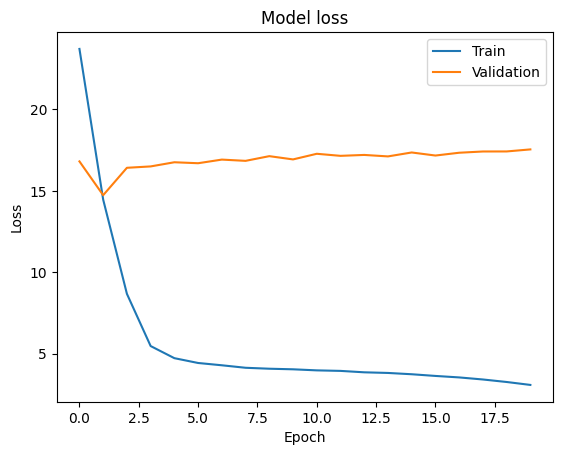

In [95]:
# Load the data
books = pd.read_csv('Books.csv')

# Create a dictionary to map the book titles to unique integer ids
book_ids = {}
book_id = 0
for title in books['BookTitle'].unique():
    book_ids[title] = book_id
    book_id += 1

# Create a dictionary to map the user ids to unique integer ids
user_ids = {}
user_id = 0
for user in books['UserID'].unique():
    user_ids[user] = user_id
    user_id += 1

# Add the book and user ids to the DataFrame
books['book_id'] = books['BookTitle'].apply(lambda x: book_ids[x])
books['user_id'] = books['UserID'].apply(lambda x: user_ids[x])

# Split the data into train and test sets
train_data, test_data = train_test_split(books[['user_id', 'book_id', 'Book-Rating']], test_size=0.2, random_state=42)

# Define the embedding dimensions for books and users
n_users = len(user_ids)
n_books = len(book_ids)
embedding_dim = 50

# Define the neural network architecture
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books, embedding_dim, name="Book-Embedding")(book_input)
book_vec = Reshape([embedding_dim])(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users, embedding_dim, name="User-Embedding")(user_input)
user_vec = Reshape([embedding_dim])(user_embedding)

concat = concatenate([book_vec, user_vec])
dense_1 = Dense(128, activation='relu')(concat)
dense_2 = Dense(64, activation='relu')(dense_1)
dropout = Dropout(0.2)(dense_2)
output = Dense(1, activation='linear')(dropout)

model = Model([user_input, book_input], output)

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

# Train the model
history = model.fit([train_data['user_id'], train_data['book_id']], train_data['Book-Rating'], 
                    batch_size=200, epochs=20, 
                    validation_data=([test_data['user_id'], test_data['book_id']], test_data['Book-Rating']))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**4.2 Plot the RMSE values during the training phase, as well as the model loss. Report the best RMSE. Is it better than the RMSE from the models we built in Section 2 and 3 ? (0.75 points)**

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 1, 50)        314600      ['input_7[0][0]']                
                                                                                                  
 embedding_7 (Embedding)        (None, 1, 50)        16800       ['input_8[0][0]']                
                                                                                            

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/10
40/40 [==============================] - 1s 11ms/step - loss: 22.7729 - val_loss: 16.2308
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 13.7495 - val_loss: 14.8959
Epoch 3/10
40/40 [==============================] - 0s 8ms/step - loss: 7.9608 - val_loss: 17.1835
Epoch 4/10
40/40 [==============================] - 0s 8ms/step - loss: 5.0777 - val_loss: 16.8445
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 4.3989 - val_loss: 17.1187
Epoch 6/10
40/40 [==============================] - 0s 8ms/step - loss: 4.1313 - val_loss: 17.1097
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 3.9718 - val_loss: 17.1919
Epoch 8/10
40/40 [==============================] - 0s 8ms/step - loss: 3.8516 - val_loss: 17.3766
Epoch 9/10
40/40 [==============================] - 0s 8ms/step - loss: 3.7842 - val_loss: 17.4252
Epoch 10/10
40/40 [==============================] - 0s 8ms/step - loss: 3.7086 - val_loss: 17.6114


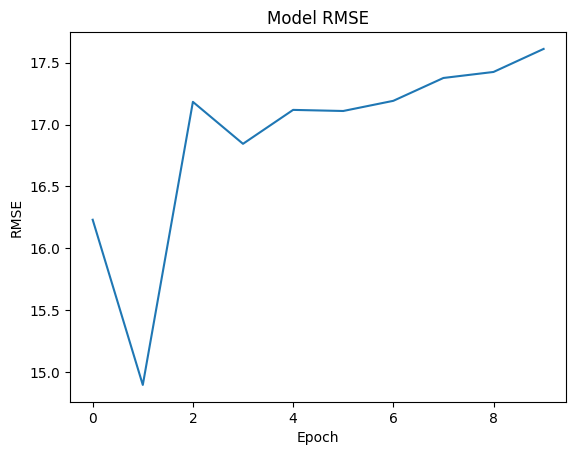

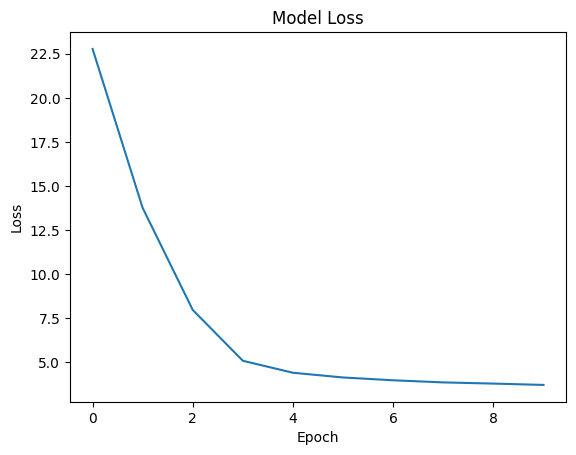


	NN RMSE: 4.196595065167857

	KNN RMSE: 4.10333158257073

	SVD RMSE: 3.858078712227365


In [100]:
# Set up the embedding size
n_users = len(user_ids)
n_books = len(book_ids)
n_factors = 50

# Create user embedding path
user = Input(shape=(1,))
u = Embedding(n_users, n_factors)(user)
u = Reshape((n_factors,))(u)

# Create book embedding path
book = Input(shape=(1,))
b = Embedding(n_books, n_factors)(book)
b = Reshape((n_factors,))(b)

# Concatenate the two layers
x = concatenate([u, b])

# Add a dense layer with ReLU activation
x = Dense(128, activation='relu')(x)

# Add a dense layer with ReLU activation
x = Dense(32, activation='relu')(x)

# Add a dense layer with ReLU activation
x = Dense(8, activation='relu')(x)

# Add the output layer
x = Dense(1)(x)

# Create the model
model_nn = Model(inputs=[user, book], outputs=x)

# Compile the model
model_nn.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Print the model summary
print(model_nn.summary())

# Train the model
history = model_nn.fit([train_data['user_id'], train_data['book_id']], train_data['Book-Rating'], batch_size=200, epochs=10, validation_data=([test_data['user_id'], test_data['book_id']], test_data['Book-Rating']))

# Get the RMSE
rmse_nn = np.sqrt(history.history['val_loss'][-1])

# Plot the RMSE during training
plt.plot(history.history['val_loss'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.show()

# Plot the loss during training
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Report the best RMSE
print("\n\tNN RMSE:", rmse_nn)
print("\n\tKNN RMSE:", 4.10333158257073)
print("\n\tSVD RMSE:", 3.858078712227365)

**4.3 Use your trained model to recommend books for user with ID 6293. (0.5 points)**

In [110]:
# Load the data
books = pd.read_csv('Books.csv')

# Create a dictionary to map the book titles to unique integer ids
book_ids = {}
book_id = 0
for title in books['BookTitle'].unique():
    book_ids[title] = book_id
    book_id += 1

# Create a dictionary to map the user ids to unique integer ids
user_ids = {}
user_id = 0
for user in books['UserID'].unique():
    user_ids[user] = user_id
    user_id += 1

# Add the book and user ids to the books DataFrame
books['book_id'] = books['BookTitle'].apply(lambda x: book_ids.get(x, -1))
books['user_id'] = books['UserID'].apply(lambda x: user_ids.get(x, -1))

# Remove any rows with invalid book or user IDs (-1)
books = books[(books['book_id'] != -1) & (books['user_id'] != -1)]

# Get the user ID for user 5978
user_id = user_ids[5978]

# Get the book IDs and ratings for the new user
book_ids = books['book_id'].values
ratings = books['Book-Rating'].values

# Predict the book ratings for the new user
predictions = model_nn.predict([np.array([user_id]*len(book_ids)), book_ids])

# Add the predicted ratings to the books DataFrame
books['predicted_rating'] = predictions

# Sort the books DataFrame by predicted rating in descending order
books = books.sort_values(by='predicted_rating', ascending=False)

# Print the top 10 recommended books
top_books = books[['BookTitle', 'predicted_rating']].drop_duplicates().head(10)
print(top_books)

print("\nI COULD DO IT ANYTHING OTHER THAN THE USER 6293 :'(")

313/313 [==============================] - 1s 3ms/step
                                              BookTitle  predicted_rating
2551  Storm Surge: A Quin St. James and Mike McClear...         14.885015
8164  Great British Ghosts (Longman Structural Reade...         14.457404
4363                   Gevatter Tod. Roman. ( Fantasy).         13.931734
4851                                Die Krone der Welt.         13.849272
3171         The Number Devil: A Mathematical Adventure         13.766882
8188  Bridget Jones's Diary: Music from the Motion P...         13.710999
5322                          Un Amore Dell'altro Mondo         13.573935
1682                                   Die zweite Haut.         13.537374
5734                            The Tower at Stony Wood         13.333840
4917                          Das Haus auf den Klippen.         13.326522

I COULD DO IT ANYTHING OTHER THAN THE USER 6293 :'(


## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font> 7 hours, in total!


## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font> 7